In [1]:
import os
import sys
import config as cfg
import time
import copy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import itertools

from datetime import datetime  
from datetime import timedelta 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#from fastai.old.fastai.imports import *
#from fastai.old.fastai.structured import *

%matplotlib inline
sns.set()

In [2]:
PROJECT_NAME = 'TimeSeriesKb'
PROJECT_START_DATE = '28/06/19' #ENGLISH DATE FORMAT
PROJECT_END_DATE = '' #ENGLISH DATE FORMAT

In [3]:
#ROOT, PROJECT_ROOT, PACKAGE_ROOT = config.configure_environment('Local',PROJECT_NAME)

config = cfg.privateConfig(cfg.OS, PROJECT_NAME)

The haribo package provides the following functions to use in Jupyter:

set_screen_width() - sets cells to be 90% of screen width

show_df(dataFrame, allRows = False) - shows all columns of a dataFrame when displayed

pickle_it(data, path) - safely pickles a file

from_pickle_jar(path) - safely loads a pickled file



In [4]:
from CodeCandy.haribo import jupyter as candy

# Import data from CSV

In [5]:
dfRaw = pd.read_csv(
    os.path.join(config.PROJECT_ROOT, 'Data', 'raw.csv'),
    parse_dates=['Date', 'ClassTime'],
    dayfirst=True,
    index_col='Date', 
    dtype={
        'AcademicYear':np.int32,
        'Week': np.int32,
        'HeadCount': np.int32,
        'PaidCount': np.int32,
    }
)

dfRaw['year'] = [d.year for d in dfRaw.index]
dfRaw['month'] = [d.strftime('%b') for d in dfRaw.index]

In [6]:
candy.show_df(dfRaw.iloc[200:300])

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,ClassTime,Venue,Event,Social,year,month
Date,,,,,,,,,,,
2015-03-10,2014,19,37,37,144.3,6pm,Sugden,NaN,NaN,2015,Mar
2015-03-12,2014,19,29,29,113.1,7pm,Trinity,NaN,NaN,2015,Mar
2015-03-17,2014,20,41,41,159.9,6pm,Sugden,NaN,NaN,2015,Mar
2015-03-19,2014,20,23,23,89.7,7pm,Trinity,Grading,NaN,2015,Mar
2015-04-14,2014,21,33,33,128.7,6pm,Sugden,First Class,NaN,2015,Apr
2015-04-16,2014,21,5,5,19.5,7pm,Trinity,NaN,NaN,2015,Apr
2015-04-21,2014,22,22,22,85.8,6pm,Sugden,NaN,NaN,2015,Apr
2015-04-23,2014,22,21,21,81.9,6pm,Trinity,Time Change,NaN,2015,Apr
2015-04-28,2014,23,25,25,97.5,6pm,Sugden,NaN,NaN,2015,Apr


(100, 11)


In [57]:
dfRaw['ClassTime'].value_counts()

6pm       156
6.30pm    138
7pm        94
5.30pm     32
8.30pm     28
8pm         3
7.30pm      1
Name: ClassTime, dtype: int64

# Time Series EDA

## Plot time series

Text(0, 0.5, 'Number of Students')

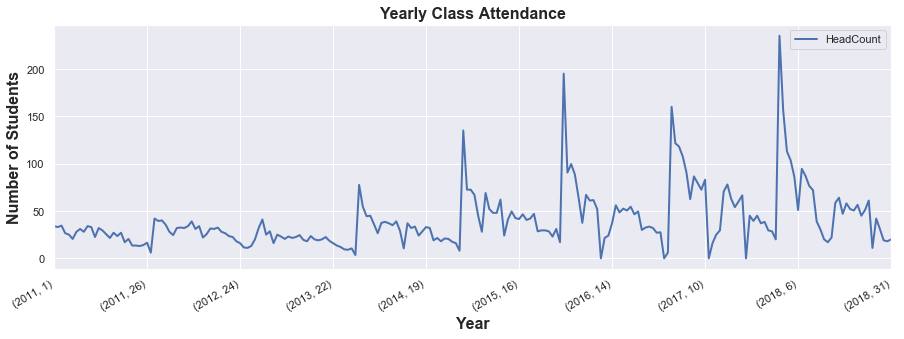

In [7]:
dfRaw[dfRaw['Event']!='No Class'][['AcademicYear','Week','HeadCount']].groupby(by=['AcademicYear','Week']).mean().plot(figsize=(15,5),linewidth=2,subplots=True)
plt.title('Yearly Class Attendance',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')

## Fill in the missing dates between classes

Text(0, 0.5, 'Number of Students')

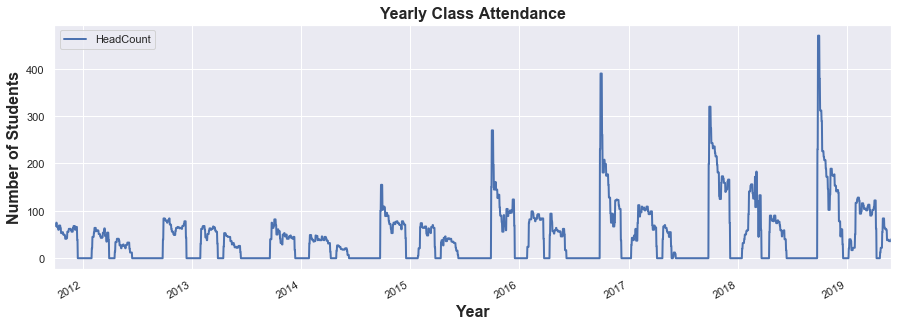

In [8]:
idx = pd.date_range(dfRaw.index.min(), dfRaw.index.max())
dfRaw.reindex(idx,fill_value=0)[['HeadCount']].rolling(window=7).sum().plot(figsize=(15,5),linewidth=2,subplots=True)
plt.title('Yearly Class Attendance',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')

## Look at the year on year seasonal patterns

Is the club growing or stagnating

Text(0, 0.5, 'Student number')

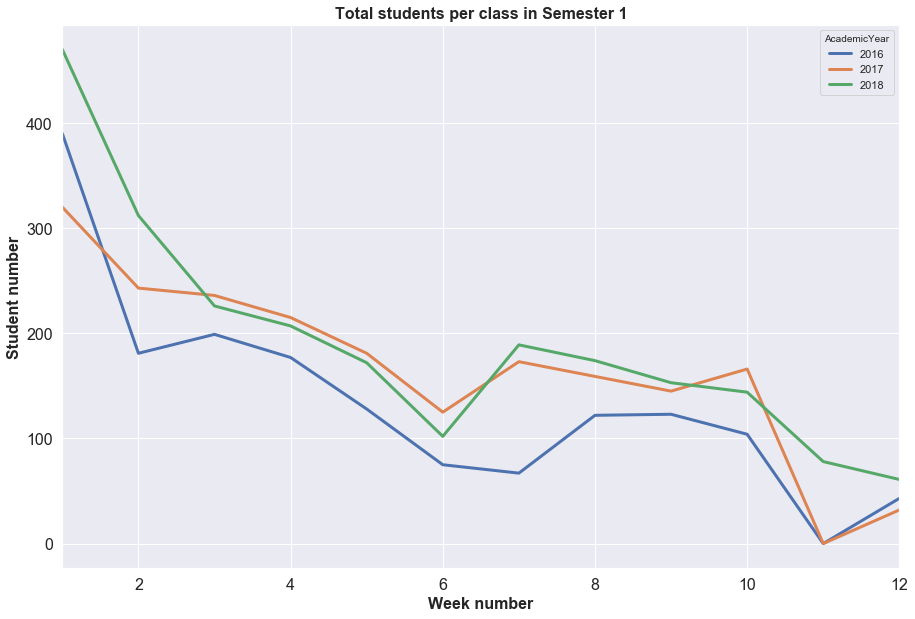

In [55]:
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>2015) & (dfRaw['Week'] <=12)], index='Week', columns='AcademicYear',
                    values='HeadCount', aggfunc='sum').plot(figsize=(15,10),fontsize=16, linewidth = 3)

plt.title('Total students per class in Semester 1',fontsize=16,fontweight='bold')
plt.xlabel('Week number',fontsize=16,fontweight='bold')
plt.ylabel('Student number',fontsize=16,fontweight='bold')

Text(0, 0.5, 'Student number')

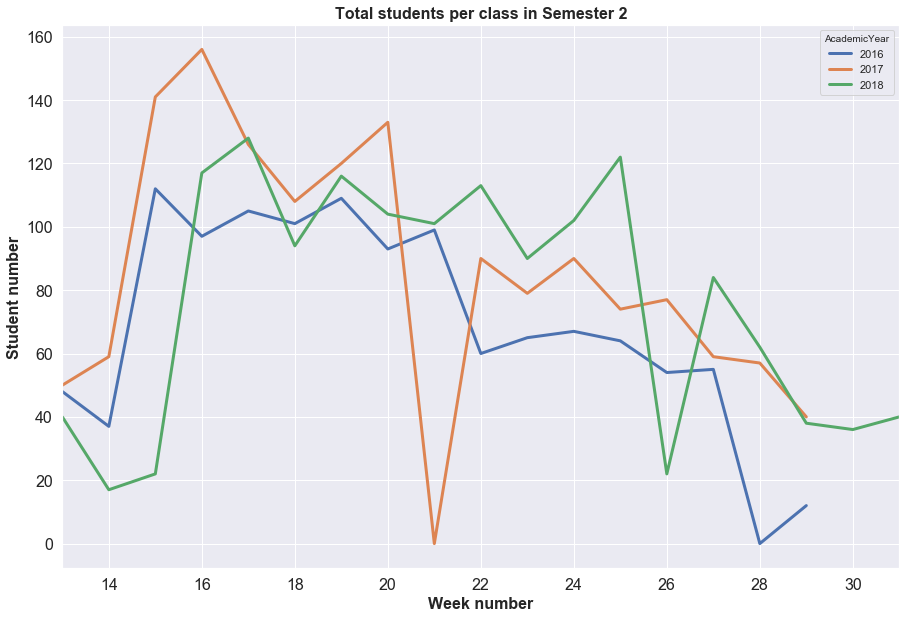

In [9]:
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>2015) & (dfRaw['Week'] >12)], index='Week', columns='AcademicYear',
                    values='HeadCount', aggfunc='sum').plot(figsize=(15,10),fontsize=16, linewidth = 3)

plt.title('Total students per class in Semester 2',fontsize=16,fontweight='bold')
plt.xlabel('Week number',fontsize=16,fontweight='bold')
plt.ylabel('Student number',fontsize=16,fontweight='bold')

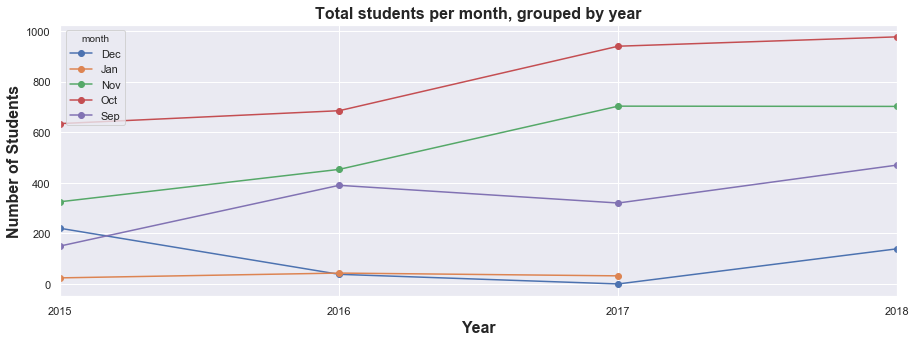

In [10]:
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>=2015) & (dfRaw['Week'] >=1) & (dfRaw['Week'] <=12)], index='AcademicYear', columns='month',
                    values='HeadCount', aggfunc='sum').plot(marker='o',figsize=(15,5))
'''
pd.pivot_table(dfRaw[(dfRaw['AcademicYear']>=2015) & (dfRaw['Week'] >=1) & (dfRaw['Week'] <=12)], index='AcademicYear', columns='month',
                    values='HeadCount', aggfunc='sum').plot(figsize=(15,5))

'''

plt.title('Total students per month, grouped by year',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')
plt.xticks([2015,2016,2017,2018]);

In [11]:
dfRaw.head()

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,ClassTime,Venue,Event,Social,year,month
Date,,,,,,,,,,,
2011-09-27,2011,1,26,0,0.0,6pm,Sugden,First Class,NaN,2011,Sep
2011-09-29,2011,1,42,0,0.0,6.30pm,Sugden,NaN,NaN,2011,Sep
2011-10-04,2011,2,33,33,128.7,6pm,Sugden,NaN,NaN,2011,Oct
2011-10-06,2011,2,33,33,128.7,6.30pm,Sugden,NaN,NaN,2011,Oct
2011-10-11,2011,3,27,27,105.3,6pm,Sugden,NaN,NaN,2011,Oct


In [12]:
list(dfRaw.columns)

['AcademicYear',
 'Week',
 'HeadCount',
 'PaidCount',
 'CashTaken',
 'ClassTime',
 'Venue',
 'Event',
 'Social',
 'year',
 'month']

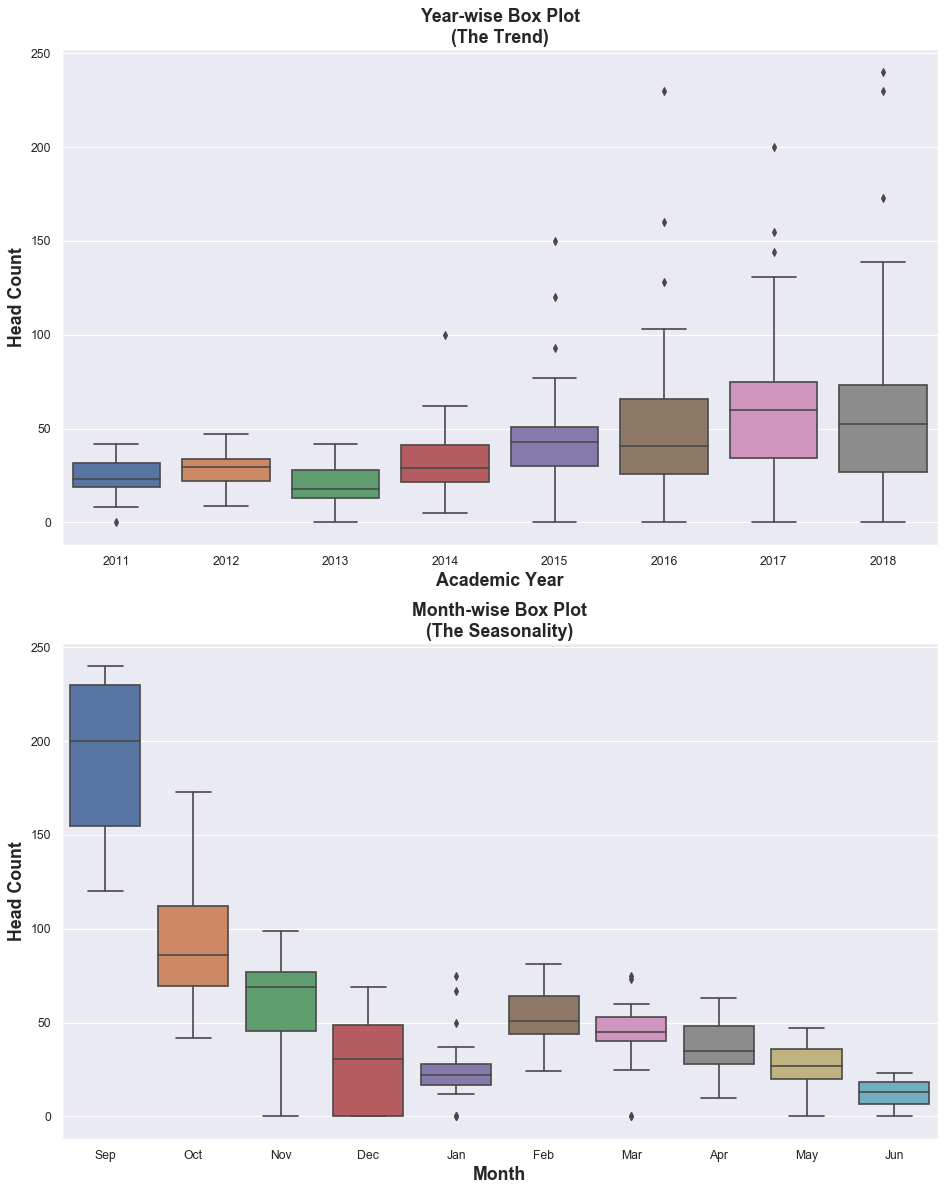

In [13]:
# Prepare data

years = dfRaw['year'].unique()

# Draw Plot
fig, axes = plt.subplots(2, 1, figsize=(12,15), dpi= 80)
sns.boxplot(x='AcademicYear', y='HeadCount', data=dfRaw, ax=axes[0])
sns.boxplot(x='month', y='HeadCount', data=dfRaw[dfRaw['AcademicYear']>=2015])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=16, fontweight='bold'); 
axes[0].set_xlabel('Academic Year', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Head Count', fontsize=16, fontweight='bold')

axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Head Count', fontsize=16, fontweight='bold')

plt.tight_layout()

Text(0, 0.5, 'Total number of students')

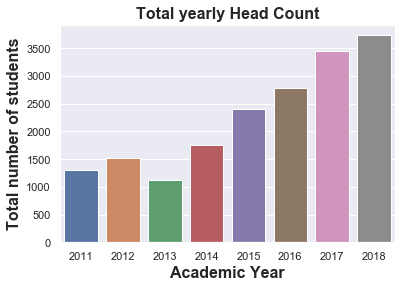

In [14]:
#dfRaw[['AcademicYear','HeadCount']].groupby('AcademicYear').sum().plot(kind='bar',figsize = (10,5))
sns.barplot(data = dfRaw[['AcademicYear','HeadCount']].groupby('AcademicYear',as_index=False).sum(),x='AcademicYear',y='HeadCount')
plt.title('Total yearly Head Count',fontsize=16,fontweight='bold')
plt.xlabel('Academic Year',fontsize=16,fontweight='bold')
plt.ylabel('Total number of students',fontsize=16,fontweight='bold')

# ARIMA Modelling

In [15]:
from statsmodels.tsa.arima_model import ARIMA

## Prepare the data

In [16]:
dfARIMA = copy.deepcopy(dfRaw)
dfARIMA=dfARIMA.reindex(idx,fill_value=0)[['HeadCount']].resample('W').sum().fillna(0)#.rolling(window=7).mean().resample('W').mean().fillna(0)

In [17]:
dfARIMA.isnull().sum()

HeadCount    0
dtype: int64

In [18]:
candy.show_df(dfARIMA.head())

,HeadCount
2011-10-02,68
2011-10-09,66
2011-10-16,69
2011-10-23,53
2011-10-30,50


(5, 1)


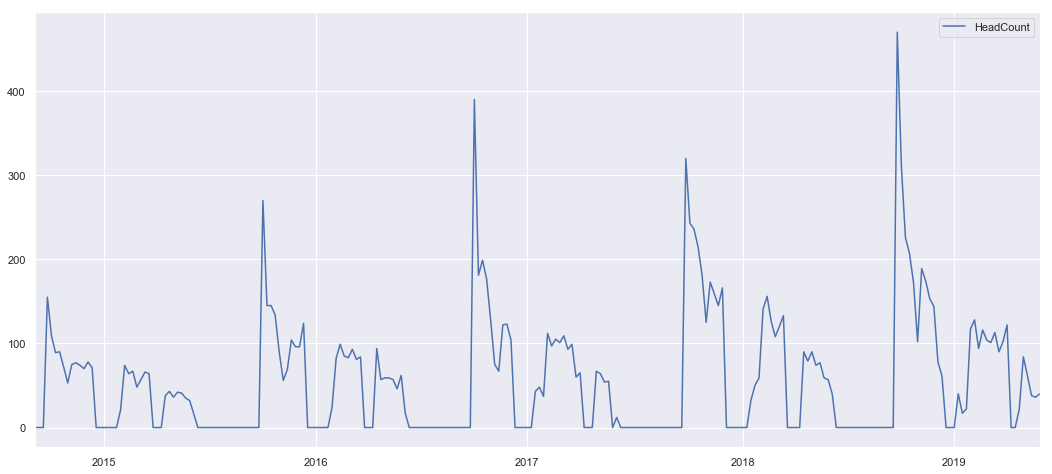

In [19]:
y = dfARIMA[dfARIMA.index >='2014-09-01']
y.plot(figsize = (18,8))

### Test for Seasonality

Text(0, 0.5, 'Seasonality')

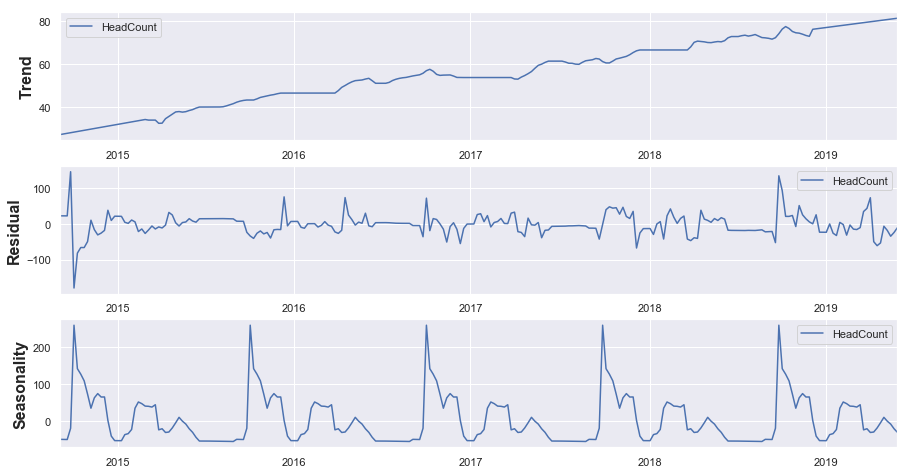

In [20]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
#decomposition.plot()


fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
decomposition.trend.plot(ax=ax1)
ax1.set_ylabel('Trend',fontsize=16,fontweight='bold')
decomposition.resid.plot(ax=ax2)
ax2.set_ylabel('Residual',fontsize=16,fontweight='bold')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonality',fontsize=16,fontweight='bold')

### Look at the detrended data

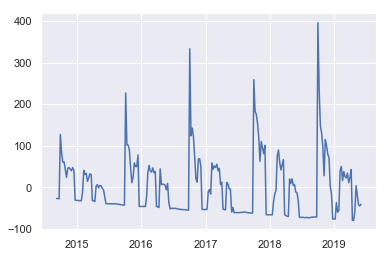

In [21]:
plt.plot(y.values -decomposition.trend)

### Look at the deseasoned data

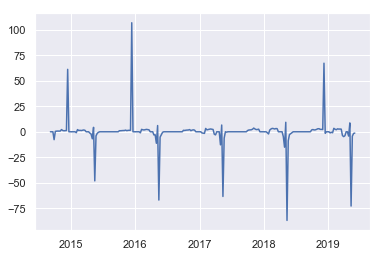

In [22]:
result_mul = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = y.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)

### Look at the autocorrelation of the data

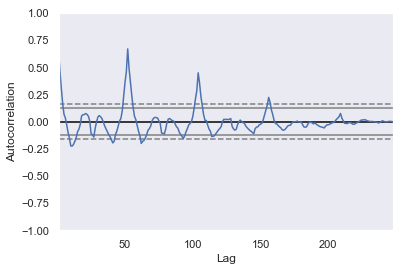

In [23]:
pd.plotting.autocorrelation_plot(y.values.tolist())

### Test for stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(y.HeadCount, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(y.HeadCount, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.217651213707578
p-value: 2.1521273554144935e-10
Critial Values:
   1%, -3.457105309726321
Critial Values:
   5%, -2.873313676101283
Critial Values:
   10%, -2.5730443824681606

KPSS Statistic: 0.272732
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/anaconda3/envs/general/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### Calculate differencing required (d term)

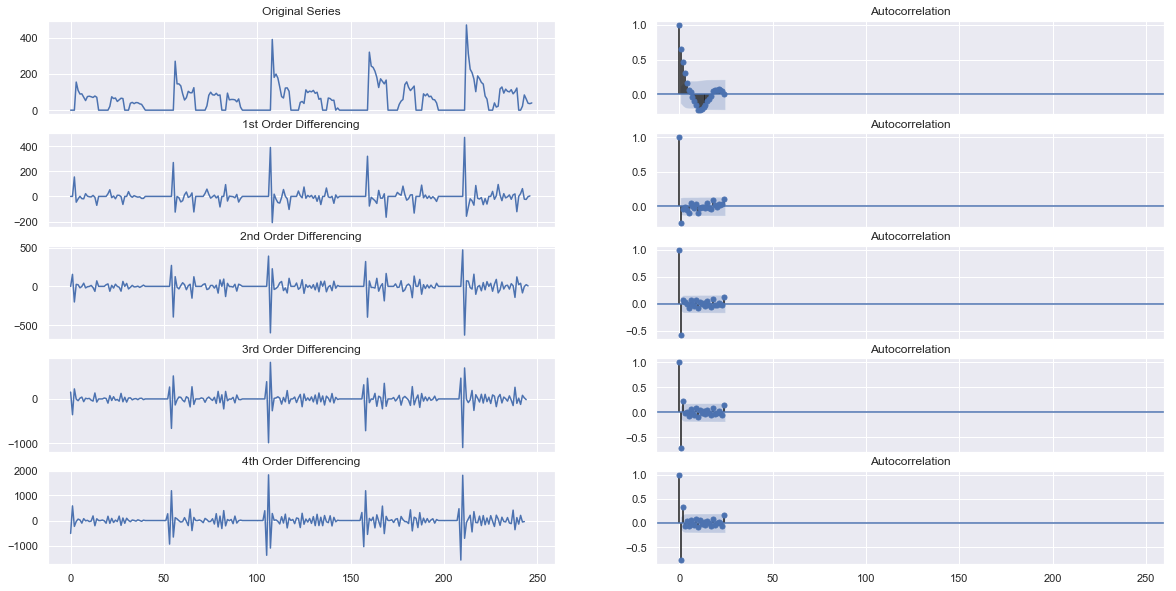

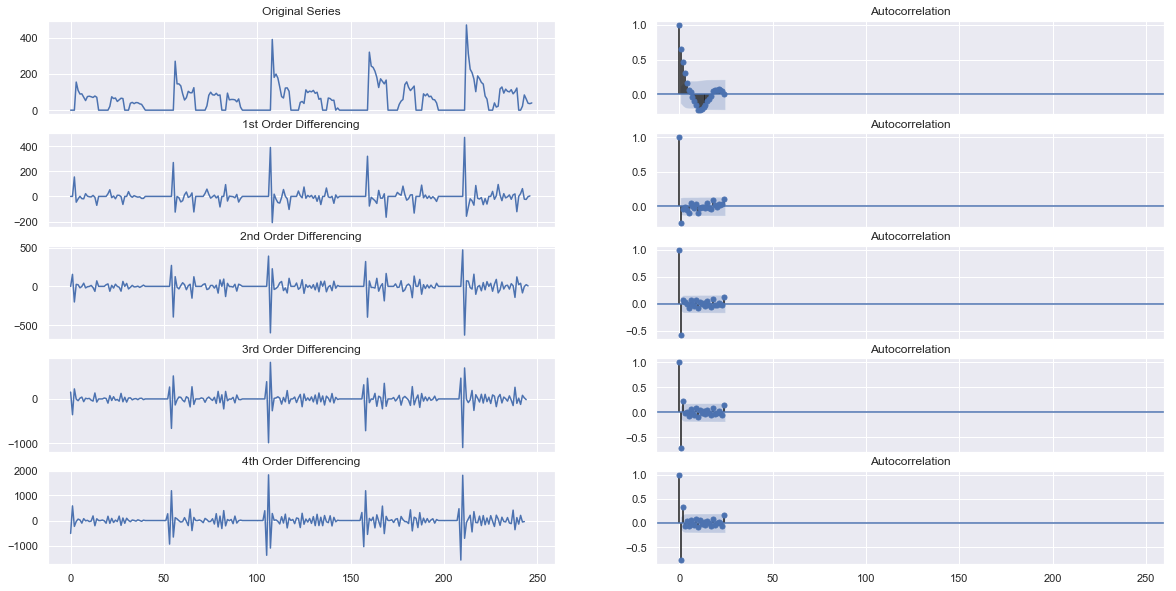

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(5, 2, sharex=True,figsize=(20,10))
axes[0, 0].plot(y.HeadCount.values); axes[0, 0].set_title('Original Series')
plot_acf(y.HeadCount, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.HeadCount.diff().dropna().values); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.HeadCount.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.HeadCount.diff().diff().dropna().values); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.HeadCount.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(y.HeadCount.diff().diff().diff().dropna().values); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(y.HeadCount.diff().diff().diff().dropna(), ax=axes[3, 1])

# 4th Differencing
axes[4, 0].plot(y.HeadCount.diff().diff().diff().diff().dropna().values); axes[4, 0].set_title('4th Order Differencing')
plot_acf(y.HeadCount.diff().diff().diff().diff().dropna(), ax=axes[4, 1])





In [26]:
result = adfuller(y.HeadCount.diff().dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(y.HeadCount.diff().dropna().values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -9.475523502364865
p-value: 3.9993152613884e-16
Critial Values:
   1%, -3.457664132155201
Critial Values:
   5%, -2.8735585105960224
Critial Values:
   10%, -2.5731749894132916

KPSS Statistic: 0.040221
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/anaconda3/envs/general/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### Calcultaing the AR term (p)

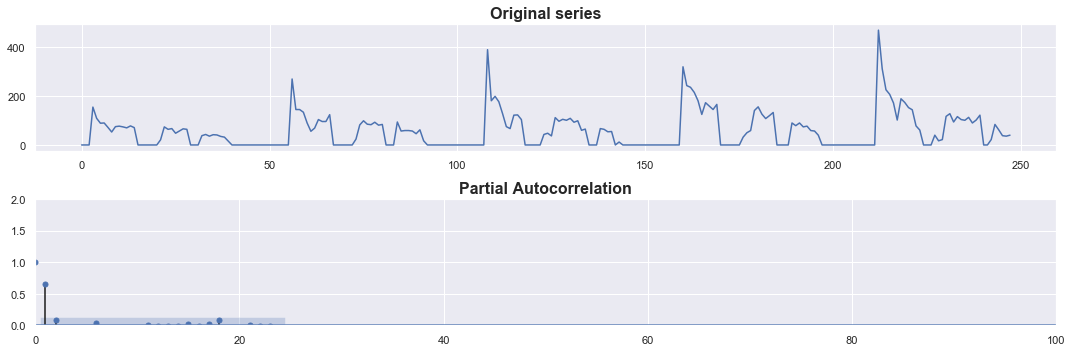

In [27]:
fig, axes = plt.subplots(2, 1, sharex=False, figsize = (15,5))
axes[0].plot(y.HeadCount.dropna().values); axes[0].set_title('Original series',fontsize=16,fontweight='bold')
axes[1].set(ylim=(0,5))
plot_pacf(y.HeadCount.dropna(), ax=axes[1])
axes[1].set_title('Partial Autocorrelation',fontsize=16,fontweight='bold')
axes[1].set_xlim([0, 100])
axes[1].set_ylim([0,2])
plt.tight_layout()

p term of 0 or 1

### Calculating the MA term (q)

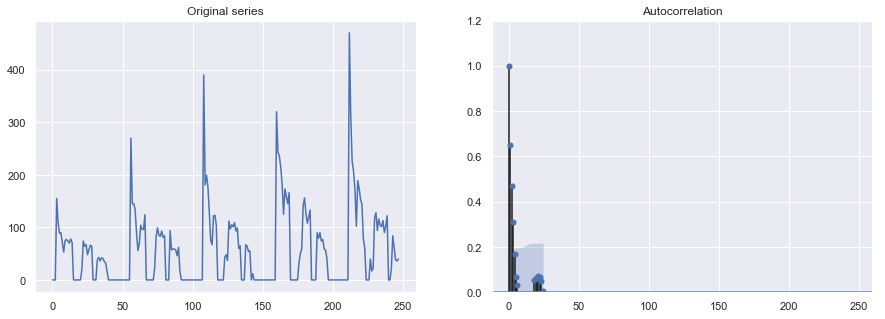

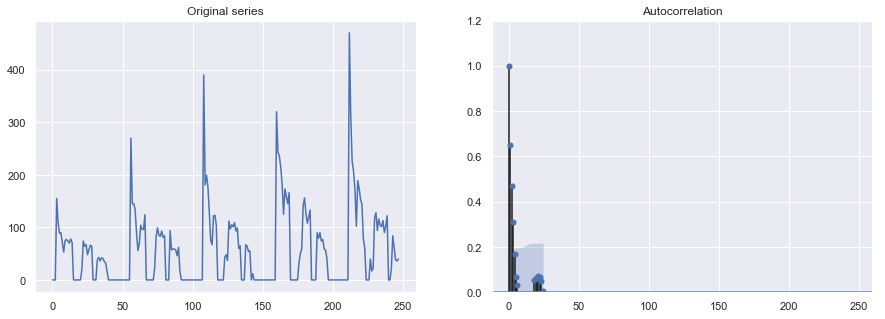

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, sharex=True, figsize = (15,5))
axes[0].plot(y.HeadCount.dropna().values); axes[0].set_title('Original series')
axes[1].set(ylim=(0,1.2))
plot_acf(y.HeadCount.dropna().dropna(), ax=axes[1])

q term of 3

## Fit the model

### Use statsmodel SARIMAX model to fit ARIMA terms

In [29]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 3),
                                #seasonal_order=(1, 1, 1, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
print(results.aic)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8491      0.080     10.586      0.000       0.692       1.006
ma.L1         -0.1837      0.123     -1.499      0.134      -0.424       0.056
ma.L2          0.0097      0.131      0.074      0.941      -0.247       0.267
ma.L3          0.0044      0.186      0.024      0.981      -0.361       0.370
sigma2      3151.9871     67.572     46.647      0.000    3019.549    3284.425
2668.101486843433


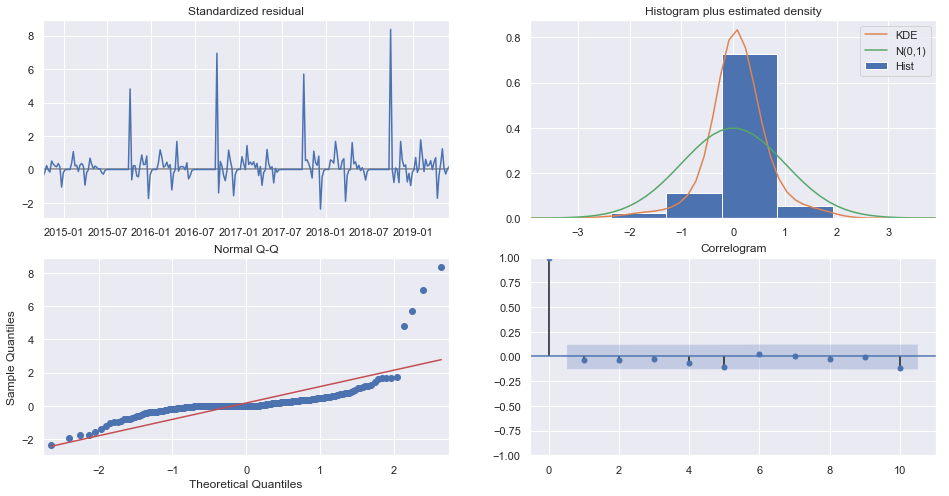

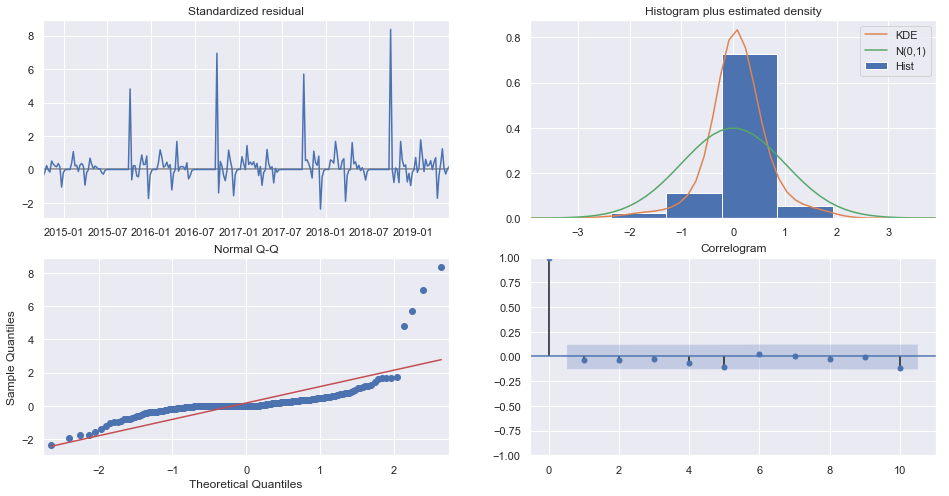

In [30]:
results.plot_diagnostics(figsize=(16, 8))

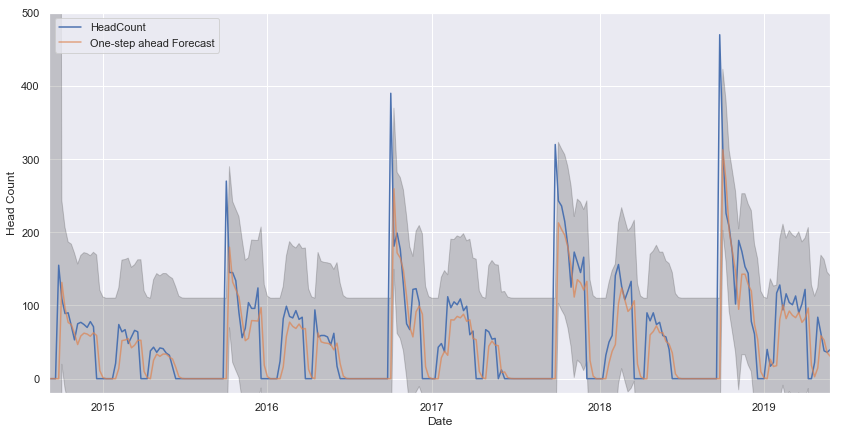

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2014-09-07'), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Head Count')
plt.ylim(-20, 500)
plt.legend()


In [32]:
forecast_vals = pred.predicted_mean.values
truth_vals = y.values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))

R2: -0.01800567912067974
MSE: 3198.259936197466
RMSE: 56.55316026711032
MAE: 23.89405349461718


### Use statsmodel ARIMA model to fit ARIMA terms

In [33]:
model = ARIMA(y.HeadCount, order=(1,0,3),freq='W')
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:              HeadCount   No. Observations:                  248
Model:                     ARMA(1, 3)   Log Likelihood               -1344.329
Method:                       css-mle   S.D. of innovations             54.628
Date:                Fri, 02 Aug 2019   AIC                           2700.658
Time:                        14:03:13   BIC                           2721.739
Sample:                    09-07-2014   HQIC                          2709.145
                         - 06-02-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              56.4208      9.771      5.774      0.000      37.270      75.572
ar.L1.HeadCount     0.5292      0.164      3.236      0.001       0.209       0.850
ma.L1.HeadCount     0.0657      

Text(0.5, 1.0, 'Density')

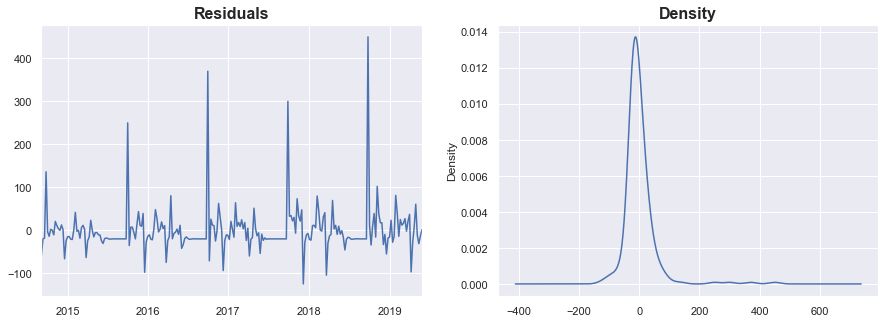

In [34]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(15,5))
residuals.plot(title="Residuals", ax=ax[0],legend=False)
ax[0].set_title('Residuals',fontsize=16,fontweight='bold')
residuals.plot(kind='kde', title='Density', ax=ax[1],legend=False)
ax[1].set_title('Density',fontsize=16,fontweight='bold')

In [35]:
residuals.describe()

,0
count,248.000000
mean,0.166804
std,54.793972
min,-124.697719
25%,-19.902593
50%,-12.144457
75%,10.994308
max,450.097074


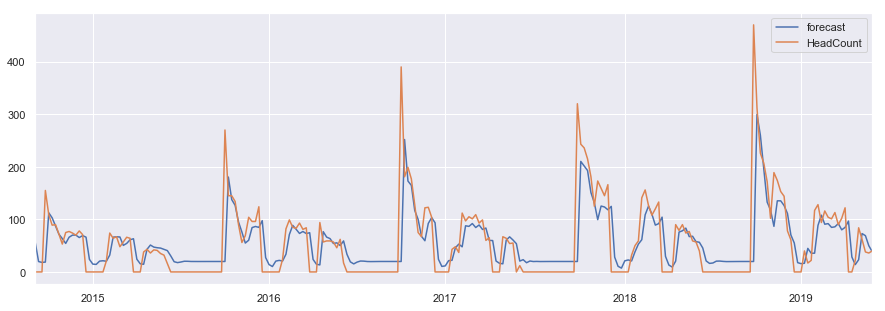

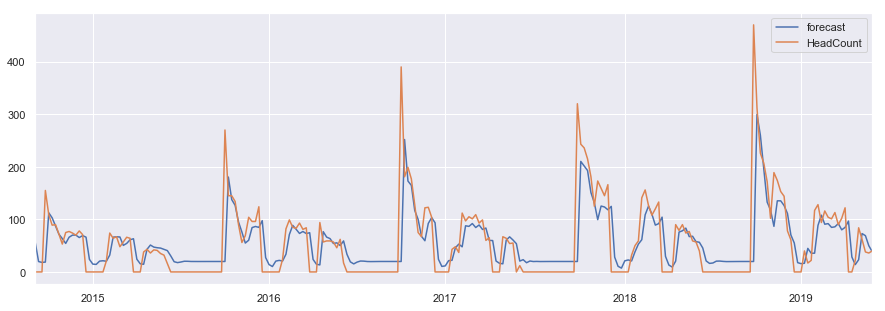

In [36]:
# Actual vs Fitted
fig, ax = plt.subplots(1,1,figsize=(15,5))
model_fit.plot_predict(dynamic=False,ax=ax)


In [37]:
forecast_vals = model_fit.predict().values
truth_vals = y.values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))

R2: -0.3198220527640874
MSE: 2990.300856568635
RMSE: 54.68364340978603
MAE: 28.65920584800541


### Use Auto ARIMA to obtain optimal parameters for SARIMA

In [38]:
import pmdarima as pm

In [39]:
start_date = pd.to_datetime('2018-09-30')
train = y[y.index<= start_date]
test = y.loc[start_date+timedelta(weeks=1): y.index.max()]

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 52); AIC=1621.612, BIC=1637.019, Fit time=9.836 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=1621.787, BIC=1627.950, Fit time=0.164 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 52); AIC=1620.058, BIC=1632.384, Fit time=6.264 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 52); AIC=1620.871, BIC=1633.196, Fit time=6.508 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=1619.984, BIC=1629.228, Fit time=0.797 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 1, 52); AIC=1620.324, BIC=1632.649, Fit time=6.222 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 52); AIC=1621.982, BIC=1637.389, Fit time=11.257 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=1621.465, BIC=1633.791, Fit time=1.159 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 52); AIC=1621.556, BIC=1633.882, Fit time=1.507 seconds
Fit ARIMA: order=(2, 0, 1) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  213
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 52)   Log Likelihood                -806.992
Date:                            Fri, 02 Aug 2019   AIC                           1619.984
Time:                                    14:03:59   BIC                           1629.228
Sample:                                         0   HQIC                          1623.737
                                            - 213                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8038      2.979      3.291      0.001       3.965      15.642
ar.L1          0.1593      0.053      2.985      0.003       0.055       0.264
sigma2      1321.3083     78.525     16.827      0.000    1167.402    1475.214
===================================================================================
Ljung-Box (Q):                       22.04   Jarque-Bera (JB):               395.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.24
Prob(H) (two-sided):                  0.82   Kurtosis:                        10.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

R2: 0.5606152941497207
MSE: 1459.5350860218678
RMSE: 38.20386218724316
MAE: 24.67345128757073


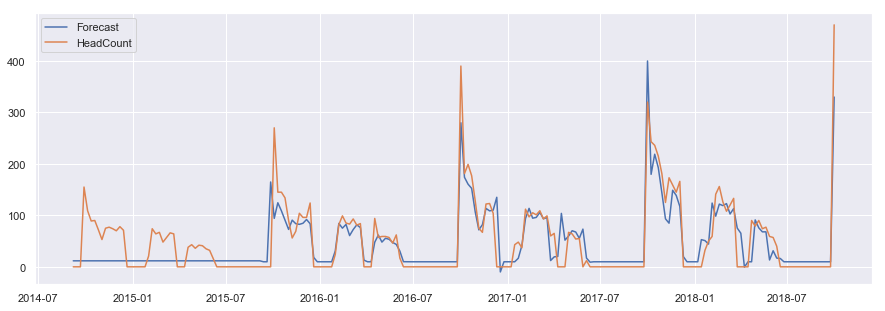

In [40]:
plt.figure(figsize=(15,5))

plt.plot(train.index,smodel.predict_in_sample())
plt.plot(train)
plt.legend(['Forecast', 'HeadCount'])

#Evaluate model
forecast_vals = smodel.predict_in_sample()
truth_vals = train.values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))


### Fit SARIMAX model with trend and seasonal terms, and evaluate

R2: 0.5936230652987646
MSE: 1690.0863987624166
RMSE: 41.110660402898134
MAE: 24.286232412688005


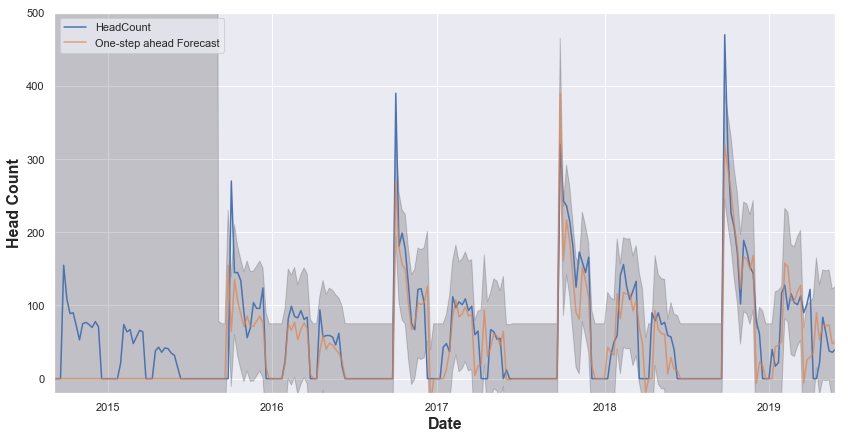

In [41]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 0, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results = mod.fit()

#Predict or forecast
start_date = y.index.min()
pred = results.get_prediction(start=start_date,end=y.index.max(), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date', fontsize=16,fontweight='bold')
ax.set_ylabel('Head Count', fontsize=16,fontweight='bold')
plt.legend()
plt.ylim(-20,500)


#Evaluate model
forecast_vals = pred.predicted_mean.values
truth_vals = y.values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))

## Forecast - out of sample forecasting

### ARIMA model without one-step-forward validation

R2: 0.41523314409192535
MSE: 4528.578316112596
RMSE: 67.29471239341615
MAE: 55.67920415604037


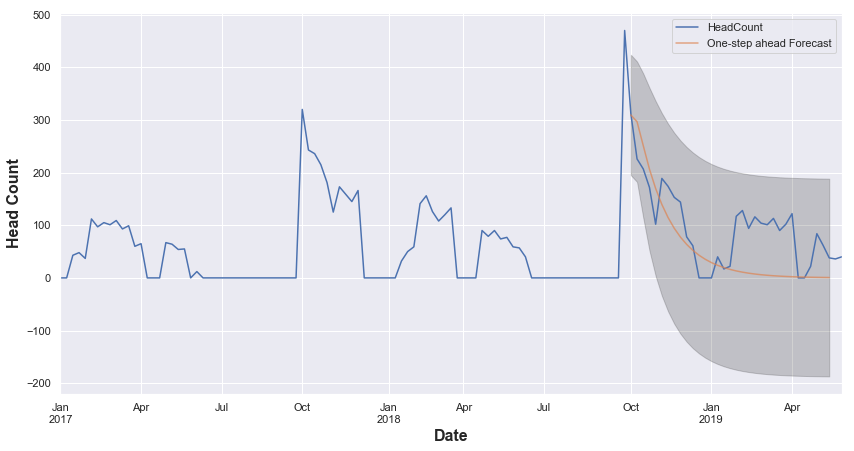

In [42]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(y[y.index <='2018-10-07'],
                                order=(1, 0, 3),
                                #seasonal_order=(0, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

#Predict or forecast
start_date = pd.to_datetime('2018-10-07')
pred = results.get_prediction(start=start_date,end=start_date + timedelta(weeks=32), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date', fontsize=16,fontweight='bold')
ax.set_ylabel('Head Count', fontsize=16,fontweight='bold')
plt.legend()


#Evaluate model
forecast_vals = pred.predicted_mean.values
truth_vals = y['2018-10-07':pred.predicted_mean.index.max()].values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))

### ARIMA model with one-step-forward validation

R2: 0.6936543072543566
MSE: 1635.5417950544938
RMSE: 40.44183224156015
MAE: 28.610842009071455


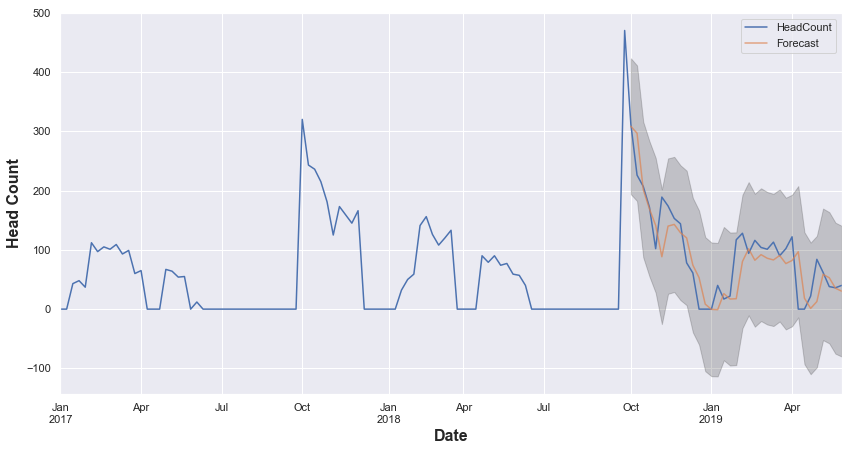

In [43]:
#Fit model
startdate = pd.to_datetime('2018-10-07')
predictions = pd.DataFrame()
pred_ci = pd.DataFrame()

for week in range(0,35):
    date = startdate +timedelta(weeks=week)
    
    mod = sm.tsa.statespace.SARIMAX(y[y.index <date],
                                order=(1, 0, 3),
                                #seasonal_order=(0, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    #make predictions
    prediction = results.get_forecast(steps=1)
    predictions = pd.concat([predictions, pd.DataFrame(prediction.predicted_mean)])
    pred_ci = pd.concat([pred_ci,prediction.conf_int()])

predictions.rename(columns={0:'Forecast'},inplace=True)


ax = y['2017':].plot(label='observed')
predictions.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date', fontsize=16,fontweight='bold')
ax.set_ylabel('Head Count', fontsize=16,fontweight='bold')
plt.legend()


#Evaluate model
forecast_vals = predictions.values
truth_vals = y['2018-10-07':predictions.index.max()].values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))

### SARIMAX model without one-step-walk-forward validation

R2: 0.6622736054895773
MSE: 2140.371487661649
RMSE: 46.26414905368572
MAE: 33.06397836271756


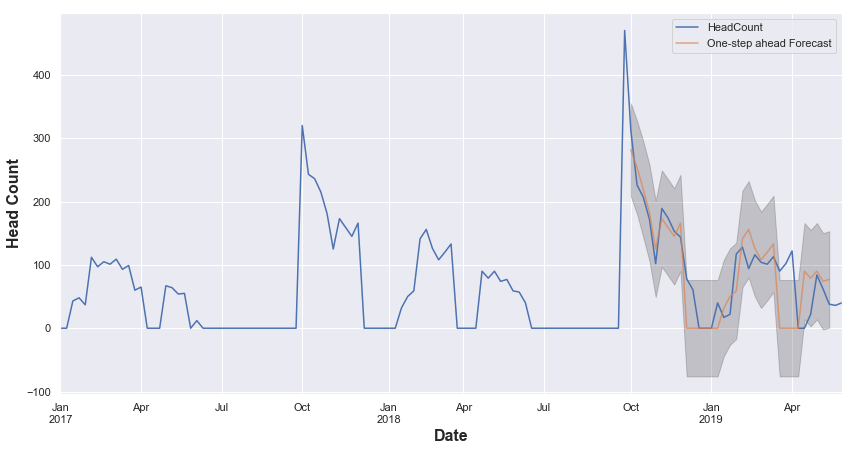

In [44]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(y[y.index <='2018-10-07'],
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 0, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results = mod.fit()

#Predict or forecast
start_date = pd.to_datetime('2018-10-07')
pred = results.get_prediction(start=start_date,end=start_date + timedelta(weeks=32), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date', fontsize=16,fontweight='bold')
ax.set_ylabel('Head Count', fontsize=16,fontweight='bold')
plt.legend()


#Evaluate model
forecast_vals = pred.predicted_mean.values
truth_vals = y['2018-10-07':pred.predicted_mean.index.max()].values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))

### SARIMAX model with one-step-walk-forward validation

R2: 0.6846589763104339
MSE: 1750.4577326196695
RMSE: 41.838471920227555
MAE: 30.989866466756798


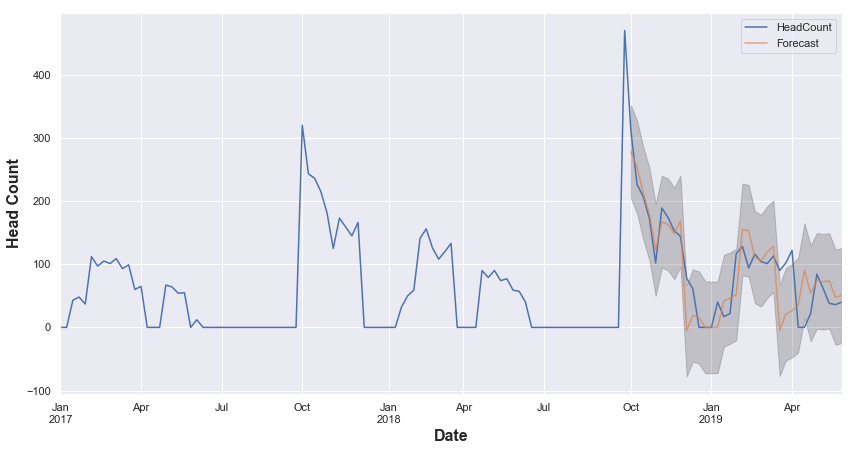

In [45]:
#Fit model
startdate = pd.to_datetime('2018-10-07')
predictions = pd.DataFrame()
pred_ci = pd.DataFrame()

for week in range(0,35):
    date = startdate +timedelta(weeks=week)
    
    mod = sm.tsa.statespace.SARIMAX(y[y.index <date],
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 0, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
    results = mod.fit()
    #make predictions
    prediction = results.get_forecast(steps=1)
    predictions = pd.concat([predictions, pd.DataFrame(prediction.predicted_mean)])
    pred_ci = pd.concat([pred_ci,prediction.conf_int()])

predictions.rename(columns={0:'Forecast'},inplace=True)


ax = y['2017':].plot(label='observed')
predictions.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date', fontsize=16,fontweight='bold')
ax.set_ylabel('Head Count', fontsize=16,fontweight='bold')
plt.legend()


#Evaluate model
forecast_vals = predictions.values
truth_vals = y['2018-10-07':predictions.index.max()].values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))

Text(0, 0.5, 'RMSE')

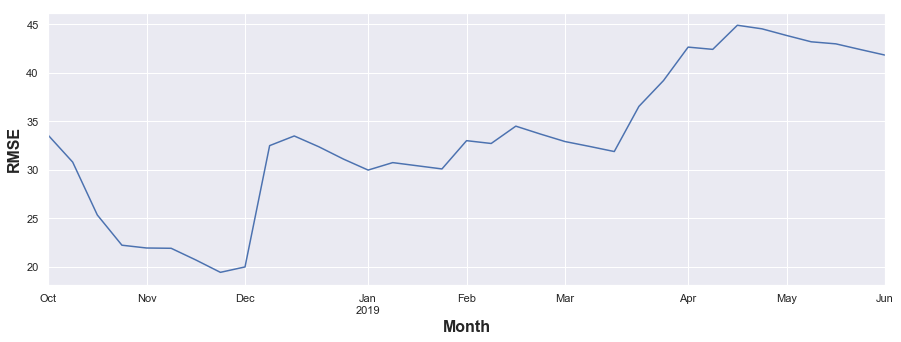

In [46]:
outputs = pd.DataFrame(pd.concat([predictions,y['2018-10-07':predictions.index.max()]],axis=1))
outputs.rename(columns={'Forecast':'Forecasted'},inplace=True)
outputs['Square Error'] = (outputs['Forecasted']-outputs['HeadCount'])**2
outputs['mse'] = outputs['Square Error'].expanding().mean()
outputs['RMSE'] = outputs['mse']**(1/2)
outputs['difference'] = (outputs['HeadCount']-outputs['Forecasted'])/outputs['HeadCount']*100
outputs['RMSE'].plot(figsize=(15,5))
plt.xlabel('Month', fontsize=16,fontweight='bold')
plt.ylabel('RMSE', fontsize=16,fontweight='bold')

# Prophet Model

In [47]:
from fbprophet import Prophet

In [48]:
dfRaw.head()

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,ClassTime,Venue,Event,Social,year,month
Date,,,,,,,,,,,
2011-09-27,2011,1,26,0,0.0,6pm,Sugden,First Class,NaN,2011,Sep
2011-09-29,2011,1,42,0,0.0,6.30pm,Sugden,NaN,NaN,2011,Sep
2011-10-04,2011,2,33,33,128.7,6pm,Sugden,NaN,NaN,2011,Oct
2011-10-06,2011,2,33,33,128.7,6.30pm,Sugden,NaN,NaN,2011,Oct
2011-10-11,2011,3,27,27,105.3,6pm,Sugden,NaN,NaN,2011,Oct


In [49]:
dfProphet = copy.deepcopy(y)
dfProphet.reset_index(inplace=True)
dfProphet.rename(columns={'index':'ds','HeadCount':'y'},inplace=True)
dfProphet.head(10)

,ds,y
0,2014-09-07,0
1,2014-09-14,0
2,2014-09-21,0
3,2014-09-28,155
4,2014-10-05,109
5,2014-10-12,89
6,2014-10-19,90
7,2014-10-26,72
8,2014-11-02,53
9,2014-11-09,75


## Implement simple Prophet - no holidays

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/general/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



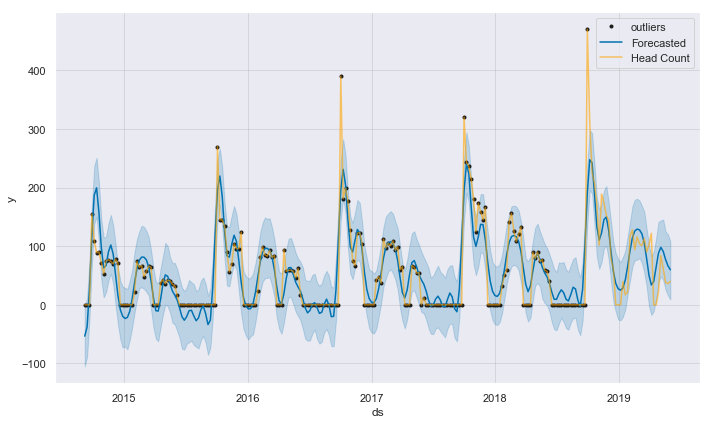

In [50]:
prediction_size = 35
train_df = dfProphet[:-prediction_size]
test_df = dfProphet[-prediction_size:]

m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods = prediction_size,freq='W')
forecast = m.predict(future)
forecast.head()

m.plot(forecast)
plt.plot(y,color='orange',alpha=.6)
plt.legend(['outliers','Forecasted','Head Count'])

In [51]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-07,22.513408,-105.123963,-2.034003,22.513408,22.513408,-75.939820,-75.939820,-75.939820,-75.939820,-75.939820,-75.939820,0.0,0.0,0.0,-53.426412
1,2014-09-14,22.864910,-88.601106,11.537504,22.864910,22.864910,-60.605189,-60.605189,-60.605189,-60.605189,-60.605189,-60.605189,0.0,0.0,0.0,-37.740279
2,2014-09-21,23.216412,-23.739153,74.213243,23.216412,23.216412,2.895058,2.895058,2.895058,2.895058,2.895058,2.895058,0.0,0.0,0.0,26.111470
3,2014-09-28,23.567914,68.257760,167.042474,23.567914,23.567914,93.220577,93.220577,93.220577,93.220577,93.220577,93.220577,0.0,0.0,0.0,116.788491
4,2014-10-05,23.919416,137.967720,236.638249,23.919416,23.919416,163.029106,163.029106,163.029106,163.029106,163.029106,163.029106,0.0,0.0,0.0,186.948522
5,2014-10-12,24.270918,150.612661,250.866108,24.270918,24.270918,175.248976,175.248976,175.248976,175.248976,175.248976,175.248976,0.0,0.0,0.0,199.519894
6,2014-10-19,24.622420,105.952295,207.836464,24.622420,24.622420,132.331066,132.331066,132.331066,132.331066,132.331066,132.331066,0.0,0.0,0.0,156.953485
7,2014-10-26,24.973922,42.238285,145.649437,24.973922,24.973922,72.560691,72.560691,72.560691,72.560691,72.560691,72.560691,0.0,0.0,0.0,97.534612
8,2014-11-02,25.325424,12.720423,114.474652,25.325424,25.325424,37.727537,37.727537,37.727537,37.727537,37.727537,37.727537,0.0,0.0,0.0,63.052961
9,2014-11-09,25.676926,22.007179,115.991471,25.676926,25.676926,41.457134,41.457134,41.457134,41.457134,41.457134,41.457134,0.0,0.0,0.0,67.134060


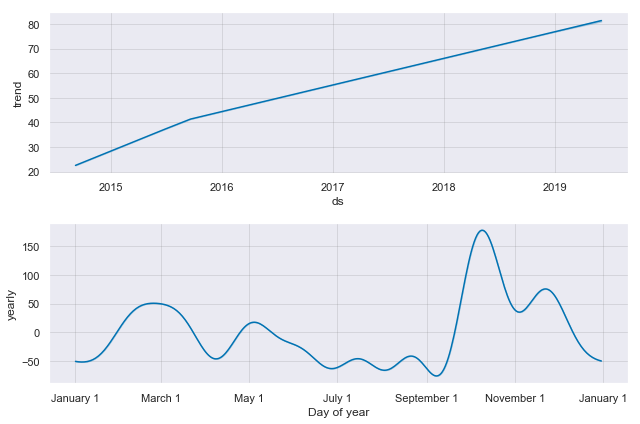

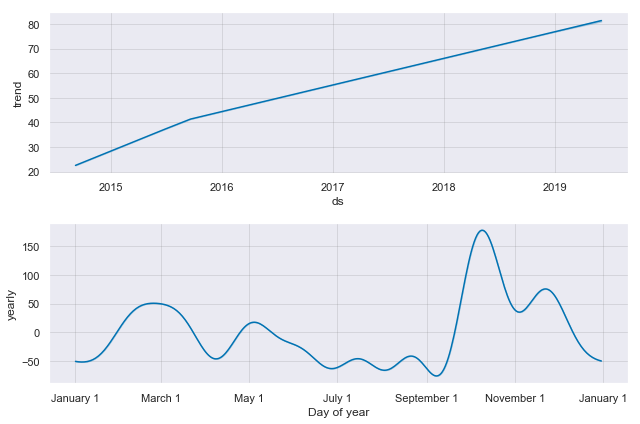

In [52]:
m.plot_components(forecast)

### Evaluate model fit

In [53]:
forecast_vals = forecast[:-prediction_size].yhat.values
truth_vals = train_df.y.values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))

R2: 0.5543093619701489
MSE: 1542.879572817822
RMSE: 39.27950576086494
MAE: 23.93664851243688


In [54]:
forecast_vals = forecast[-prediction_size:].yhat.values
truth_vals = test_df.y.values

print('R2:',r2_score(forecast_vals,truth_vals))

print('MSE:',mean_squared_error(forecast_vals,truth_vals))

print('RMSE:',mean_squared_error(forecast_vals,truth_vals)**(1/2))

print('MAE:',mean_absolute_error(forecast_vals,truth_vals))



R2: 0.5618999953946284
MSE: 1276.7250956379005
RMSE: 35.73129014796276
MAE: 29.485134962630944
